In [99]:
import numpy as np
((7/10) * np.log(10/7)/np.log(2)) + (1/5 * np.log(5)/np.log(2)) + (1/10 * np.log(10/np.log(2)))

1.0914966413158742

In [222]:
import requests
import bs4 as bs 
from datetime import delta, date

ImportError: cannot import name 'delta'

In [223]:
source = requests.get('http://www.caiso.com/market/Pages/ReportsBulletins/RenewablesReporting.aspx')
print(source)

<Response [200]>


In [224]:
print(source.content)

b'\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">\r\n<html dir="ltr" class="ms-isBot" lang="en-US">\r\n\r\n    <head><link id="ctl00_favicon" rel="shortcut icon" href="/Style Library/caiso/images/favicon.ico?rev=30" type="image/vnd.microsoft.icon" /><meta http-equiv="X-UA-Compatible" content="IE=8" /><meta name="GENERATOR" content="Microsoft SharePoint" /><meta http-equiv="Content-type" content="text/html; charset=utf-8" /><meta http-equiv="Expires" content="0" /><meta name="msapplication-TileImage" content="/_layouts/15/images/SharePointMetroAppTile.png" /><meta name="msapplication-TileColor" content="#0072C6" /><title>\r\n\t\r\n        California ISO -\r\n        Renewables and emissions reports\r\n    \r\n</title><link rel="stylesheet" type="text/css" href="/Style%20Library/en-US/Core%20Styles/page-layouts-21.css"/>\n<link rel="stylesheet" type="text/css" href="/_layouts/15/1033/styles/Themable/corev15.css?rev=Uly

In [225]:
soup = bs.BeautifulSoup(source.content, features='html.parser')

In [226]:
print(soup.find('title'))

<title>
	
        California ISO -
        Renewables and emissions reports
    
</title>


In [227]:
base_url = 'http://content.caiso.com/green/renewrpt/'
suffix = '_DailyRenewablesWatch.txt'

In [228]:
from datetime import timedelta, date

url_array = []

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2010, 4, 20)
end_date = date(2018, 4, 9)
for single_date in daterange(start_date, end_date):
    url_array.append(base_url + single_date.strftime("%Y%m%d") + suffix)
len(url_array)

2911

In [229]:
url_array[1]

'http://content.caiso.com/green/renewrpt/20100421_DailyRenewablesWatch.txt'

In [230]:
res = []
for i in range(len(url_array)):
    http = urllib3.PoolManager()
    url = url_array[i]
    response = http.request('GET', url)
    soup = BeautifulSoup(response.data)
    res.append(soup)
    
file = open('data.txt', 'wb')
for i in res:
    file.write(i.encode())


NameError: name 'urllib3' is not defined

In [231]:
import csv 
txt_file = r"data.txt"
csv_file = r"data.csv"
in_txt = csv.reader(open(txt_file, "rb"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'wb'))
out_csv.writerows(in_txt)

Error: iterator should return strings, not bytes (did you open the file in text mode?)

In [232]:
import pandas as pd
data = pd.read_csv('data.txt', sep ="	", header = None, error_bad_lines = False)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [233]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,<html><body><p>04/20/10,NaN,NaN,Hourly Breakdown of Renewable Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Hour,NaN,GEOTHERMAL,BIOMASS,NaN,BIOGAS,NaN,SMALL HYDRO,WIND TOTAL,SOLAR,NaN,NaN,NaN
2,NaN,1,NaN,1056,NaN,323,NaN,170,NaN,250,NaN,632,NaN,0
3,NaN,2,NaN,1055,NaN,318,NaN,169,NaN,245,NaN,632,NaN,0
4,NaN,3,NaN,1058,NaN,316,NaN,168,NaN,240,NaN,677,NaN,0


In [234]:
new_data = data.iloc[:, [0, 1, 3, 5, 7, 9, 11, 13]]
new_data.columns = ['Date', 'Hour', 'Geothermal', 'Biomass', 'Biogas', 'Small Hydro', 'Wind', 'Solar']
#new_data = new_data.drop([26, 27])
new_data_copy = new_data 


In [235]:
indicies = []
for i in range(len(new_data)):
    indicies.append(i % 54)
len(indicies)

51377

In [236]:
new_data['Index'] = indicies

/Users/saranshgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
valid = new_data['Index'] < 26
new_data = new_data[valid]
valid2 = new_data['Index'] != 1
valid3 = new_data['Index'] != 0
new_data = new_data[valid2]
new_data = new_data[valid3]
new_data

/Users/saranshgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date,Hour,Geothermal,Biomass,Biogas,Small Hydro,Wind,Solar,Index
2,NaN,1,1056,323,170,250,632,0,2
3,NaN,2,1055,318,169,245,632,0,3
4,NaN,3,1058,316,168,240,677,0,4
5,NaN,4,1063,318,168,238,923,0,5
6,NaN,5,1066,318,168,247,875,0,6
7,NaN,6,1066,317,169,247,998,0,7
8,NaN,7,1066,312,166,244,763,0,8
9,NaN,8,1067,313,167,269,544,1,9
10,NaN,9,1065,315,169,280,572,191,10
11,NaN,10,1063,316,167,294,721,299,11


In [238]:
new_data = new_data[:-8]

In [239]:
len(new_data)

22837

In [240]:
import matplotlib.pyplot as plt
dates = pd.date_range('4/20/2010 00:00', periods=22837, freq = 'H')
#solar = pd.Series(new_data.Solar, index=pd.date_range('4/20/2010 00:00', periods=23789, freq = 'H'))
#solar
new_data['Date'] = dates
new_data = new_data.reset_index()
new_data

/Users/saranshgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,index,Date,Hour,Geothermal,Biomass,Biogas,Small Hydro,Wind,Solar,Index
0,2,2010-04-20 00:00:00,1,1056,323,170,250,632,0,2
1,3,2010-04-20 01:00:00,2,1055,318,169,245,632,0,3
2,4,2010-04-20 02:00:00,3,1058,316,168,240,677,0,4
3,5,2010-04-20 03:00:00,4,1063,318,168,238,923,0,5
4,6,2010-04-20 04:00:00,5,1066,318,168,247,875,0,6
5,7,2010-04-20 05:00:00,6,1066,317,169,247,998,0,7
6,8,2010-04-20 06:00:00,7,1066,312,166,244,763,0,8
7,9,2010-04-20 07:00:00,8,1067,313,167,269,544,1,9
8,10,2010-04-20 08:00:00,9,1065,315,169,280,572,191,10
9,11,2010-04-20 09:00:00,10,1063,316,167,294,721,299,11


In [255]:
#new_data['Solar'] = new_data['Solar'].fillna(0)
vals = []
for i in new_data['Wind']:
    try:
        i = int(i)
        vals.append(i)
    except ValueError:
        i = 0
        vals.append(i)
        

In [256]:
len(vals)

22837

In [257]:
new_data['Wind_num'] = vals
new_data

,index,Date,Hour,Geothermal,Biomass,Biogas,Small Hydro,Wind,Solar,Index,Solar_num,Wind_num
0,2,2010-04-20 00:00:00,1,1056,323,170,250,632,0,2,0,632
1,3,2010-04-20 01:00:00,2,1055,318,169,245,632,0,3,0,632
2,4,2010-04-20 02:00:00,3,1058,316,168,240,677,0,4,0,677
3,5,2010-04-20 03:00:00,4,1063,318,168,238,923,0,5,0,923
4,6,2010-04-20 04:00:00,5,1066,318,168,247,875,0,6,0,875
5,7,2010-04-20 05:00:00,6,1066,317,169,247,998,0,7,0,998
6,8,2010-04-20 06:00:00,7,1066,312,166,244,763,0,8,0,763
7,9,2010-04-20 07:00:00,8,1067,313,167,269,544,1,9,1,544
8,10,2010-04-20 08:00:00,9,1065,315,169,280,572,191,10,191,572
9,11,2010-04-20 09:00:00,10,1063,316,167,294,721,299,11,299,721


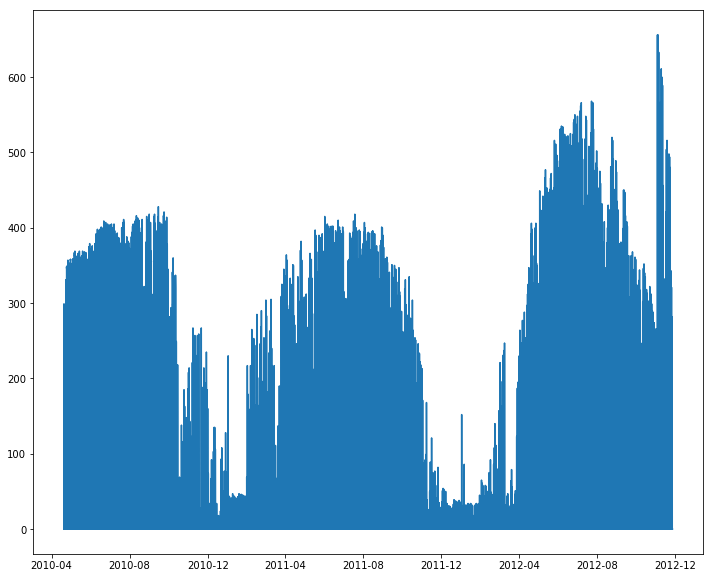

In [244]:
#plt.figure()
plt.figure(figsize=(12,10))
x = new_data['Date']
y1 = new_data['Solar_num']
plt.plot(x, y1)
plt.show()

In [246]:
vals = new_data['Solar_num']
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,22837.0,25678.128914,14833.391582,2.0,12821.0,25670.0,38519.0,51368.0
Index,22837.0,13.496869,6.922187,2.0,7.0,13.0,19.0,25.0
Solar_num,22837.0,39.911153,104.871797,0.0,0.0,0.0,0.0,656.0


In [250]:
df = new_data['Solar_num'].to_frame()

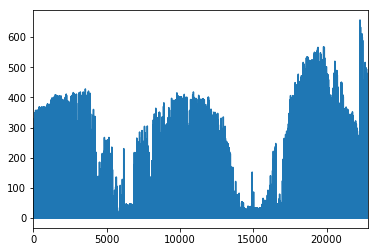

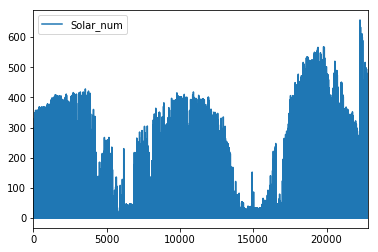

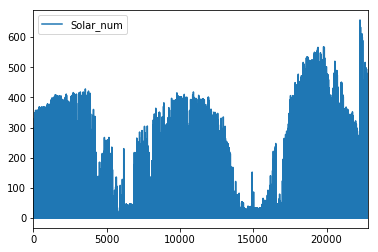

In [254]:
df.plot()
plt.show()

In [259]:
#res = vals['Wind_num']
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,22837.0,25678.128914,14833.391582,2.0,12821.0,25670.0,38519.0,51368.0
Index,22837.0,13.496869,6.922187,2.0,7.0,13.0,19.0,25.0
Solar_num,22837.0,39.911153,104.871797,0.0,0.0,0.0,0.0,656.0
Wind_num,22837.0,1832.806980,1504.951418,-21.0,648.0,1467.0,2815.0,6286.0


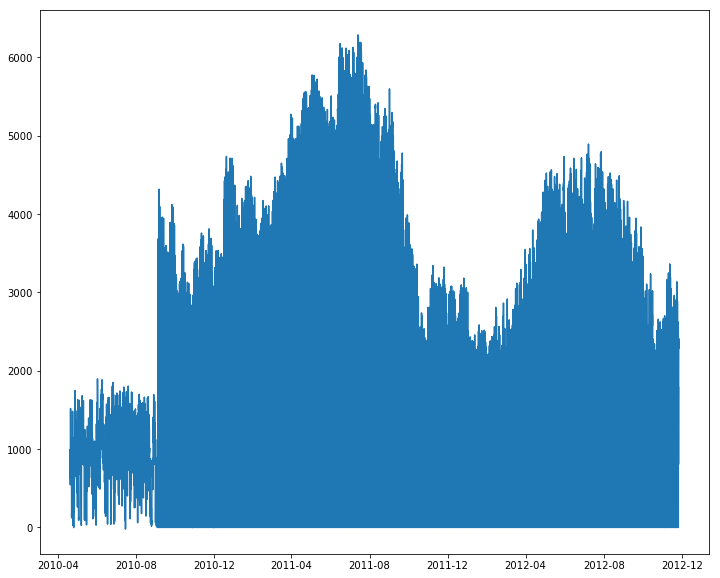

In [264]:
plt.figure(figsize=(12,10))
x = new_data['Date']
df2 = new_data['Wind_num'].to_frame()
y = new_data['Wind_num']
plt.plot(x,y)
#df2.plot()
plt.show()